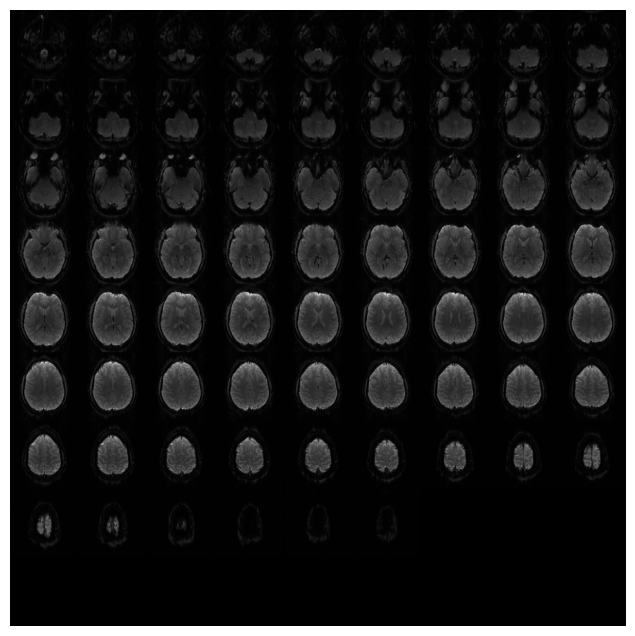

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pydicom

plt.rcParams['figure.figsize'] = [16, 8]

# Read the DICOM file
dicom_file = pydicom.dcmread('sample_fmri_image.dcm')
A = dicom_file.pixel_array

# Convert to grayscale if necessary
if len(A.shape) == 3:
	X = np.mean(A, -1)
else:
	X = A

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')         
plt.show()

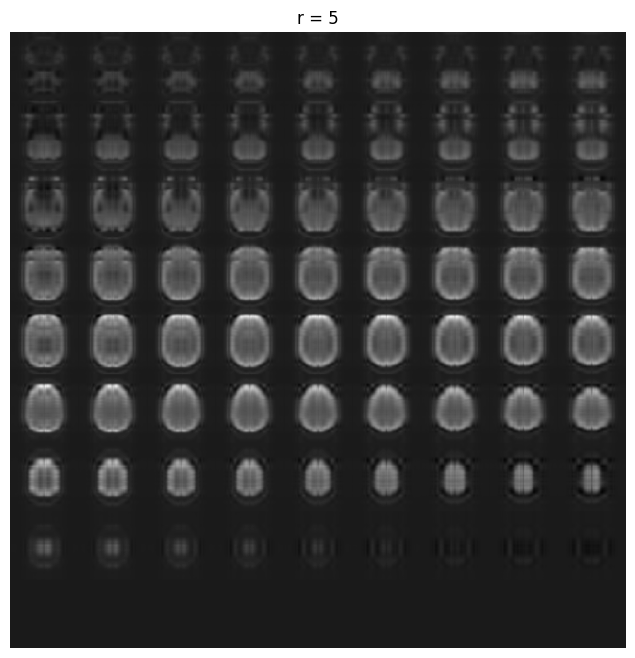

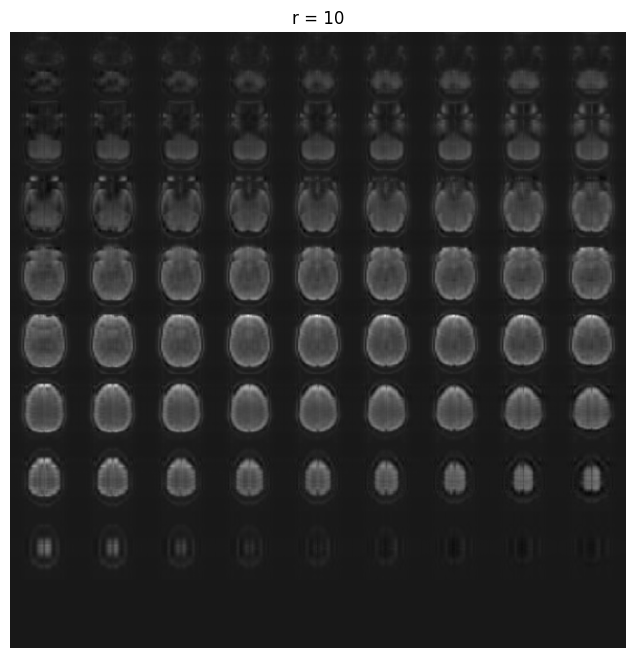

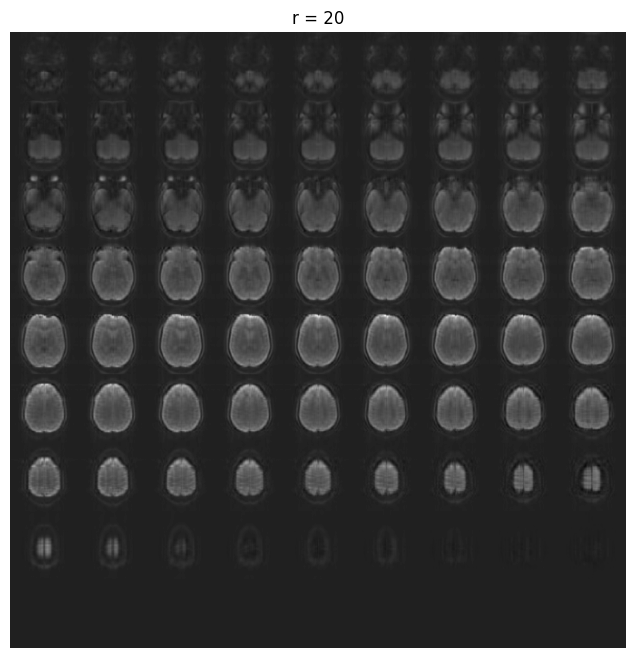

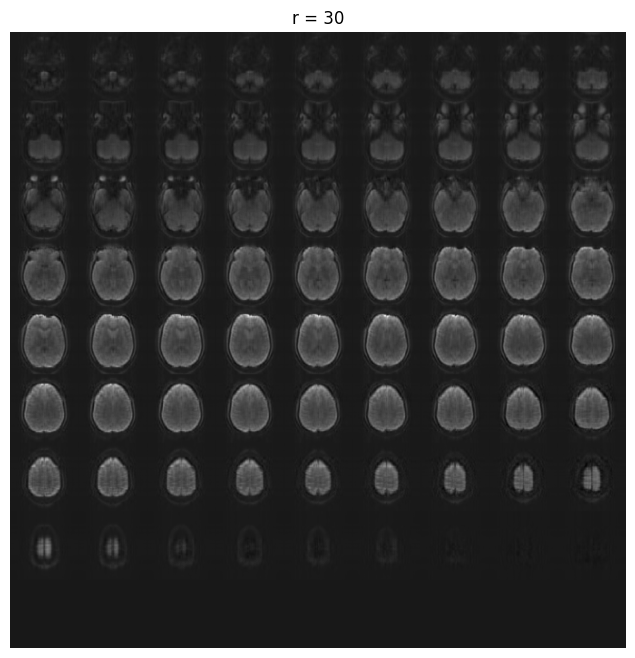

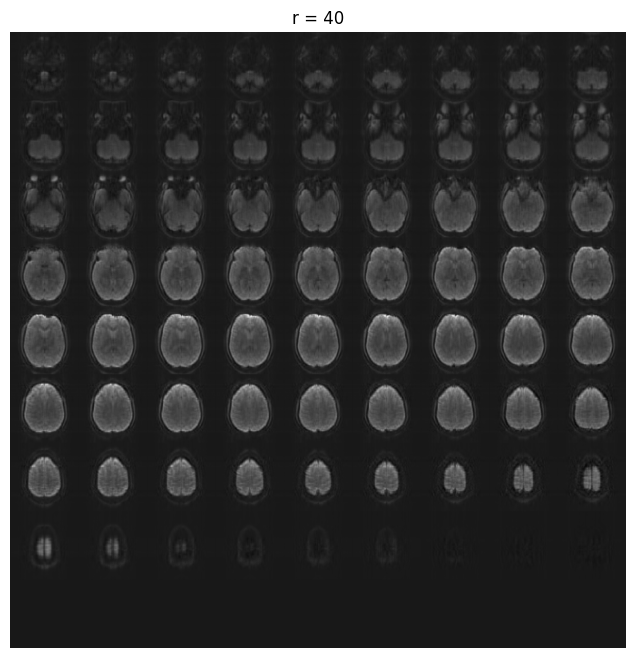

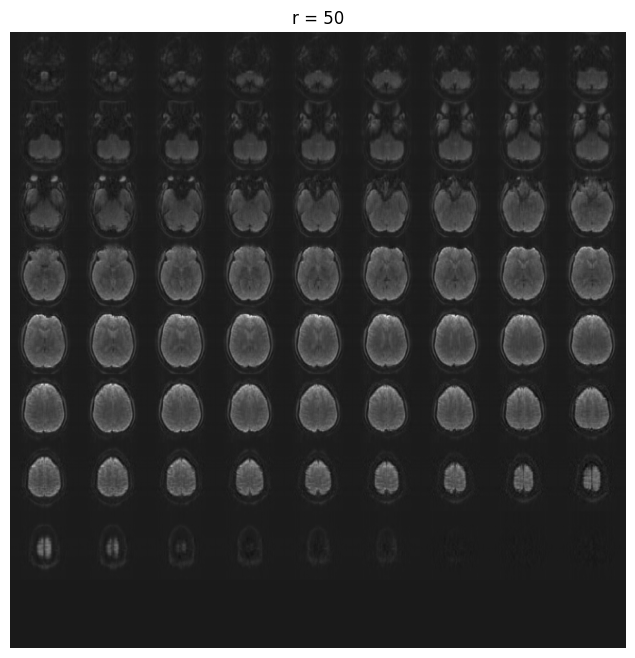

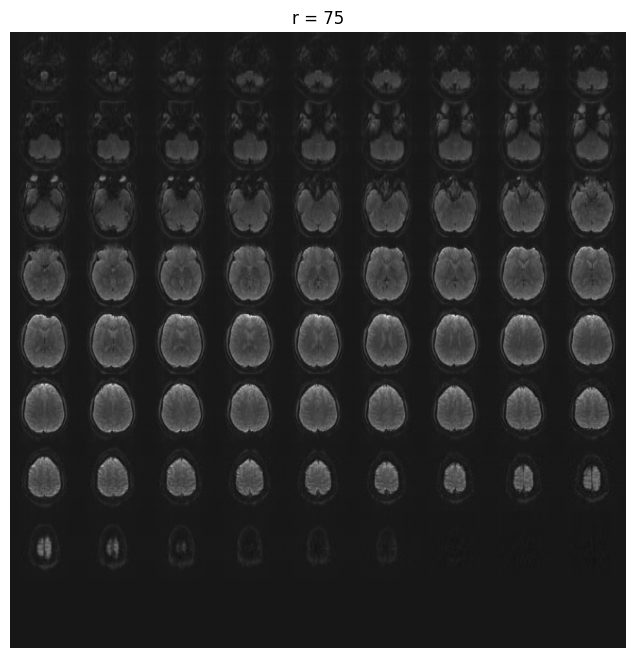

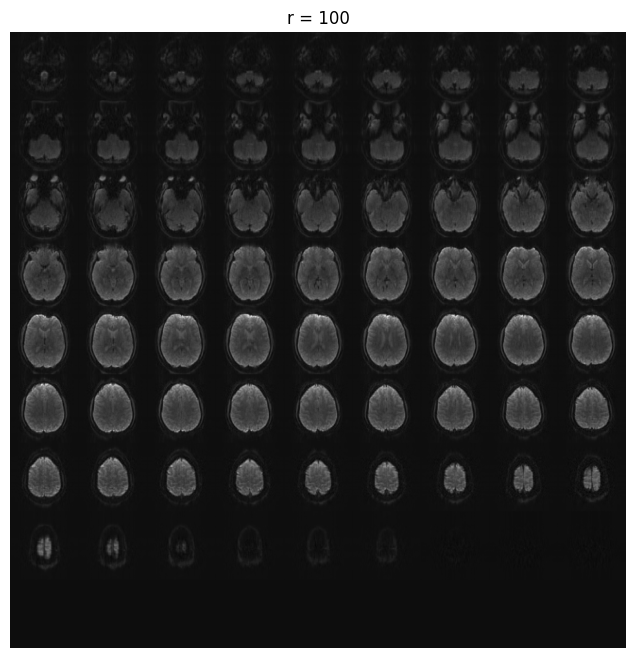

In [11]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 10, 20, 30, 40, 50, 75, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

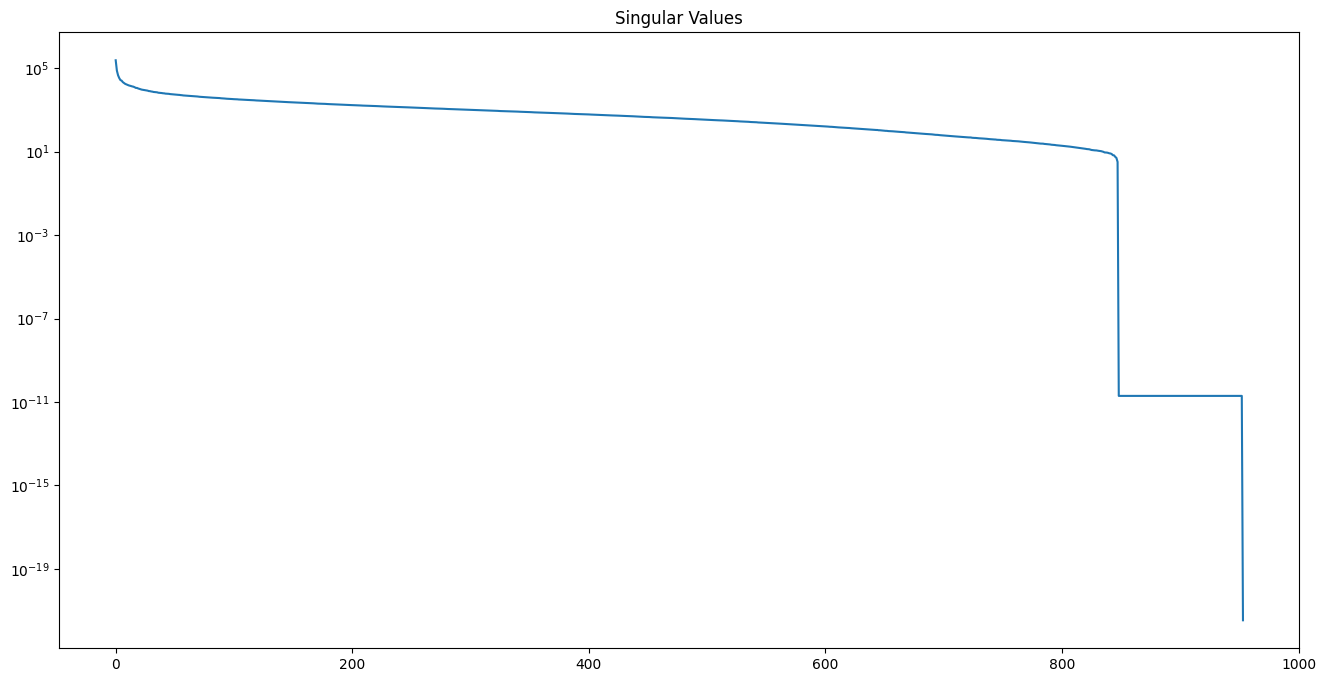

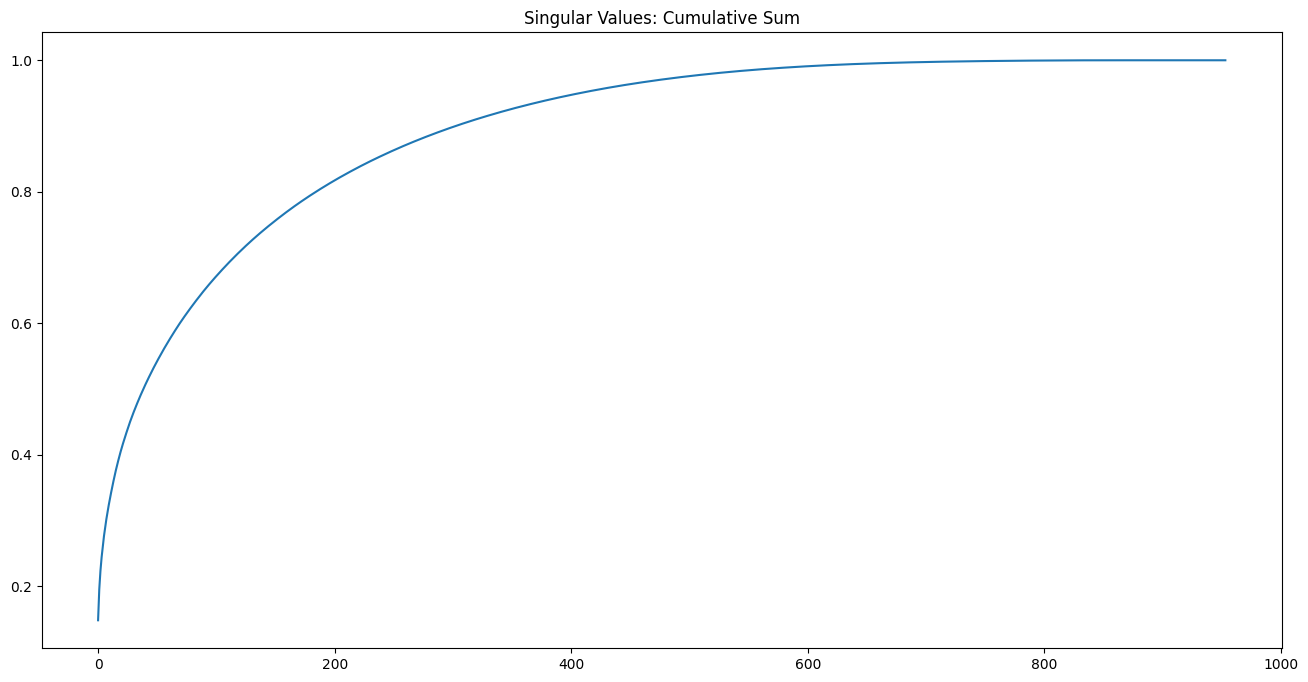

In [12]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [13]:
import os

# Save the images with different r values
for r in (5, 10, 20, 30, 40, 50, 75, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure()
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    filename = f'approx_image_r_{r}.png'
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f'Size of {filename}: {os.path.getsize(filename)} bytes')

Size of approx_image_r_5.png: 166957 bytes
Size of approx_image_r_10.png: 175032 bytes
Size of approx_image_r_20.png: 186320 bytes
Size of approx_image_r_30.png: 204479 bytes
Size of approx_image_r_40.png: 216747 bytes
Size of approx_image_r_50.png: 219578 bytes
Size of approx_image_r_75.png: 228968 bytes
Size of approx_image_r_100.png: 234826 bytes


In [14]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

for r in (5, 10, 20, 30, 40, 50, 75, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    mse = mean_squared_error(X, Xapprox)
    psnr = peak_signal_noise_ratio(X, Xapprox, data_range=X.max() - X.min())
    print(f'For r = {r}, MSE: {mse}, PSNR: {psnr} dB')

print('\nMSE values range from 0–∞, with lower being better.')
print('PSNR values range from 20–50 dB, with higher being better.')


For r = 5, MSE: 7748.914361315431, PSNR: 29.111441159584082 dB
For r = 10, MSE: 5516.69590149322, PSNR: 30.58705932314489 dB
For r = 20, MSE: 3651.880907312655, PSNR: 32.37868371011908 dB
For r = 30, MSE: 2786.695099404809, PSNR: 33.55295523322872 dB
For r = 40, MSE: 2262.656929991458, PSNR: 34.45766267113071 dB
For r = 50, MSE: 1891.0311337836988, PSNR: 35.23686298092014 dB
For r = 75, MSE: 1281.1675966833036, PSNR: 36.9277903123926 dB
For r = 100, MSE: 915.8457417139143, PSNR: 38.38562646709512 dB

MSE values range from 0–∞, with lower being better.
PSNR values range from 20–50 dB, with higher being better.


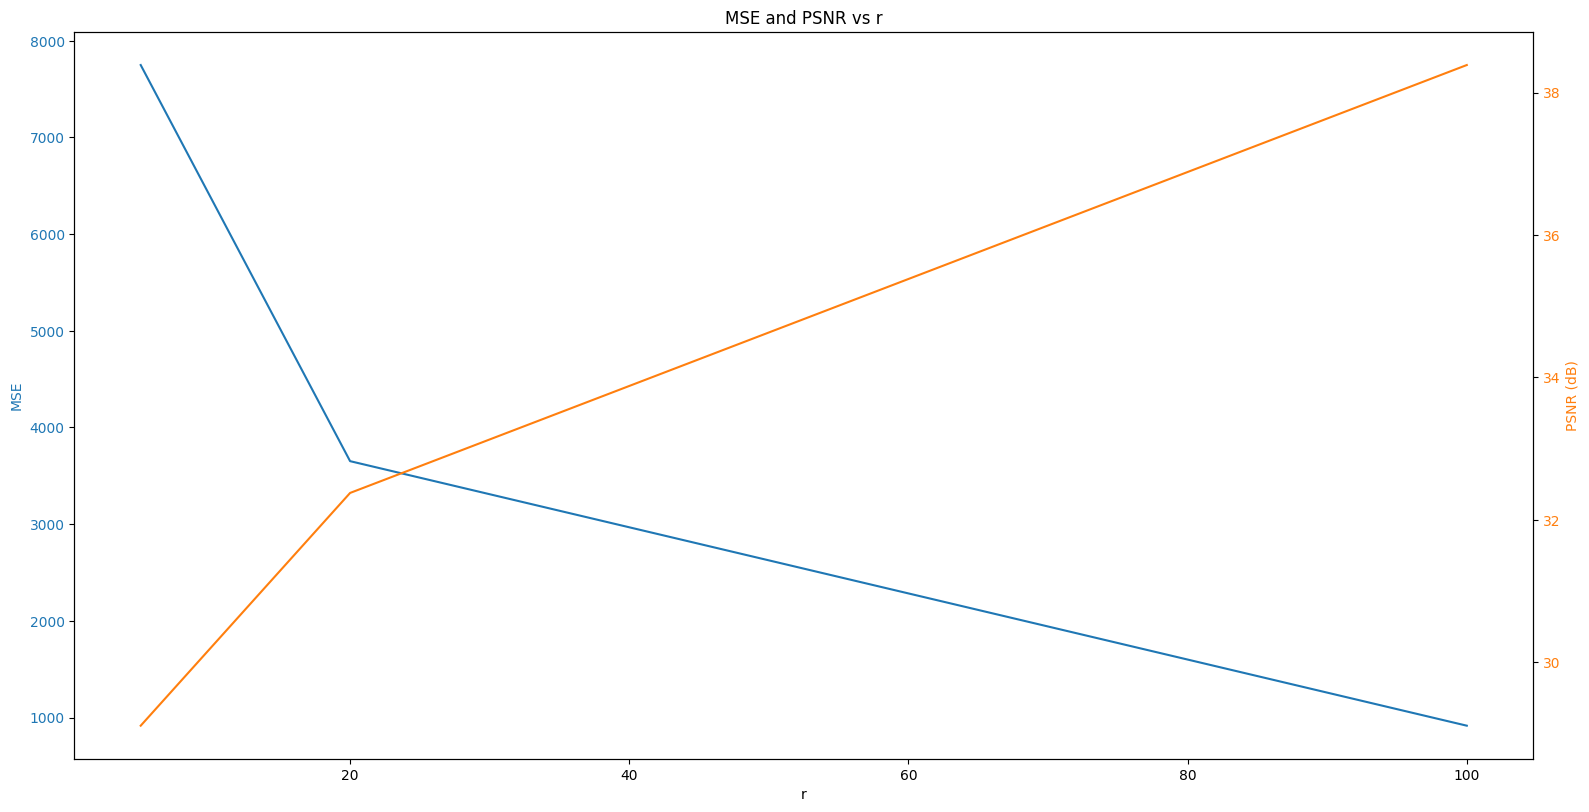

In [16]:
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('r')
    ax1.set_ylabel('MSE', color=color)
    ax1.plot(r_values, mses, color=color, label='MSE')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('PSNR (dB)', color=color)
    ax2.plot(r_values, psnrs, color=color, label='PSNR')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('MSE and PSNR vs r')
    plt.show()